In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import os

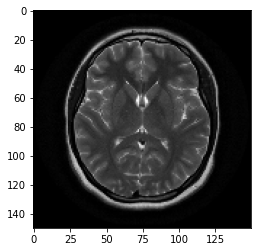

In [2]:
DATADIR = os.getcwd() + "/Data"
CATEGORIES = ["no", "yes"] # 0 for No and 1 for yes
IMG_SIZE = 150
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path)[1:]:
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        plt.imshow(new_arr, cmap = "gray")
        plt.show()
        break
    break

In [3]:
training_data = []
def make_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path)[1:]:
            img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_arr, class_num])

In [4]:
make_training_data()

In [5]:
import random
random.shuffle(training_data)

In [51]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)
#For not reshaped values of features
pickle_out = open("X_not_reshaped.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
#For not reshaped values of labels
pickle_out = open("y_not_reshaped.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [7]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [8]:
import pickle
# Saving all the work upon the images using pickle
# FOR X
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
# FOR y
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [9]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = X/255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2))) # Pooling

model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2))) # Pooling


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size = 6, epochs = 15, validation_split = 0.1)

Epoch 1/15
29/29 [==============================] - 6s 209ms/step - loss: 0.7181 - accuracy: 0.7353 - val_loss: 0.4727 - val_accuracy: 0.8421
Epoch 2/15
29/29 [==============================] - 6s 194ms/step - loss: 0.5013 - accuracy: 0.7647 - val_loss: 0.4278 - val_accuracy: 0.7895
Epoch 3/15
29/29 [==============================] - 6s 194ms/step - loss: 0.3680 - accuracy: 0.8412 - val_loss: 0.3468 - val_accuracy: 0.8421
Epoch 4/15
29/29 [==============================] - 6s 194ms/step - loss: 0.2408 - accuracy: 0.9059 - val_loss: 0.1421 - val_accuracy: 0.9474
Epoch 5/15
29/29 [==============================] - 6s 196ms/step - loss: 0.1221 - accuracy: 0.9588 - val_loss: 0.1035 - val_accuracy: 0.9474
Epoch 6/15
29/29 [==============================] - 6s 197ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.1725 - val_accuracy: 0.9474
Epoch 7/15
29/29 [==============================] - 6s 196ms/step - loss: 0.0326 - accuracy: 0.9941 - val_loss: 0.1173 - val_accuracy: 0.9474
Epoch 

In [37]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 102ms/step - loss: 1.2204 - accuracy: 0.8730


In [38]:
model.save("64x3-CNN.model")

INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


In [52]:
def reshaper(arr):
    return arr.reshape(-1, IMG_SIZE, IMG_SIZE, 1)